# Case Study (Loan Tap)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data= pd.read_csv("loan_tap.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


------------

______________

## 1. Define problem statement and perform Exploratory Data Analysis


    Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?


### a. Observations on shape of data and data types of all attributes


In [29]:
target_variable=data['loan_status']

In [30]:
data.shape

(396030, 27)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### b. Check for missing value (if any)


In [32]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### c. Display the statistical summary


In [33]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### d. Univariate Analysis and Bivariate Analysis of all the attributes



Target Variable Distribution:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


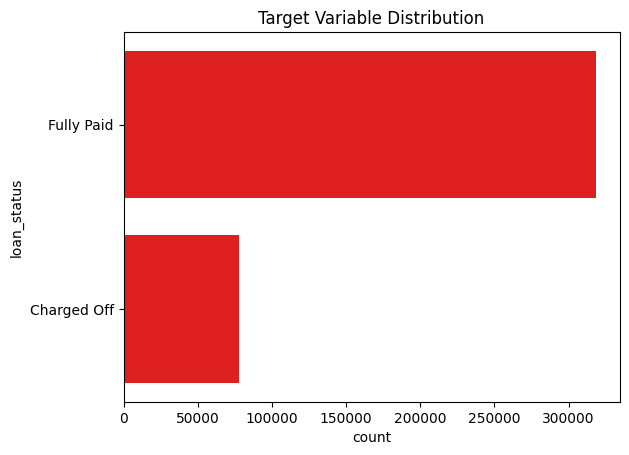

In [34]:
print(f"\nTarget Variable Distribution:\n{target_variable.value_counts()}")
sns.countplot(target_variable, color='red')
plt.title("Target Variable Distribution")
plt.show()

#### Univeriate

In [35]:
numerical_data= data.select_dtypes(include=['int64','float64']).columns
categorical_data=data.select_dtypes(include='object').columns

In [36]:
data[numerical_data]

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


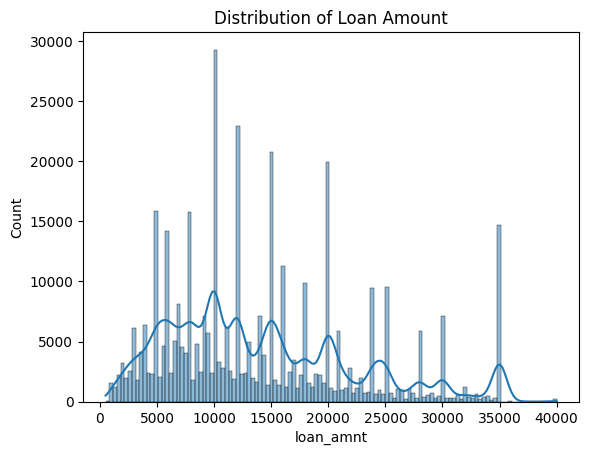

In [37]:
sns.histplot(data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

The Loan amount is mostly segregated in the range of 5000-20000 <br>
No need to check for outliers in this feature


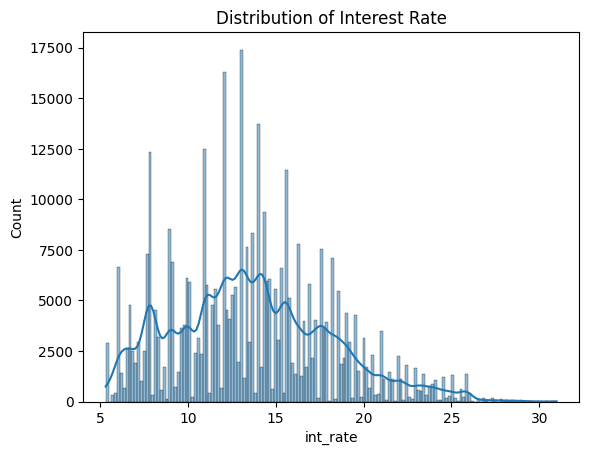

In [38]:
sns.histplot(data['int_rate'], kde=True)
plt.title('Distribution of Interest Rate')
plt.show()

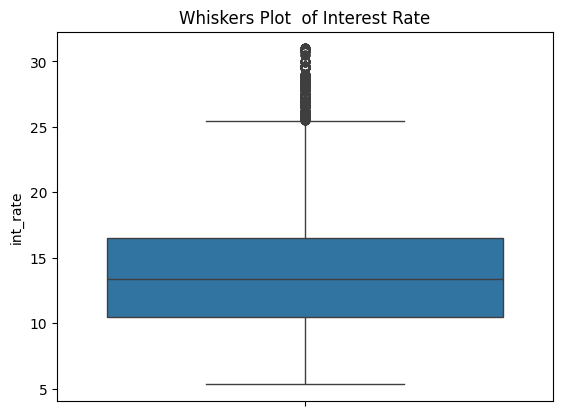

In [39]:
sns.boxplot(data=data['int_rate'])
plt.title('Whiskers Plot  of Interest Rate')
plt.show()

Their are numerous outliers in the interest rate


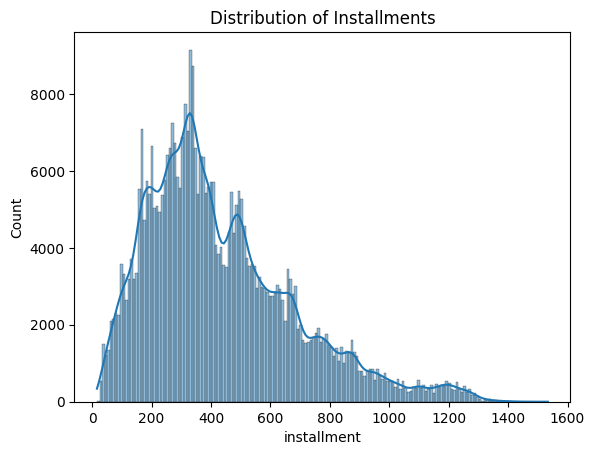

In [40]:
sns.histplot(data['installment'], kde=True)
plt.title('Distribution of Installments')
plt.show()

##### Correlation Analysis (Numerical Features)


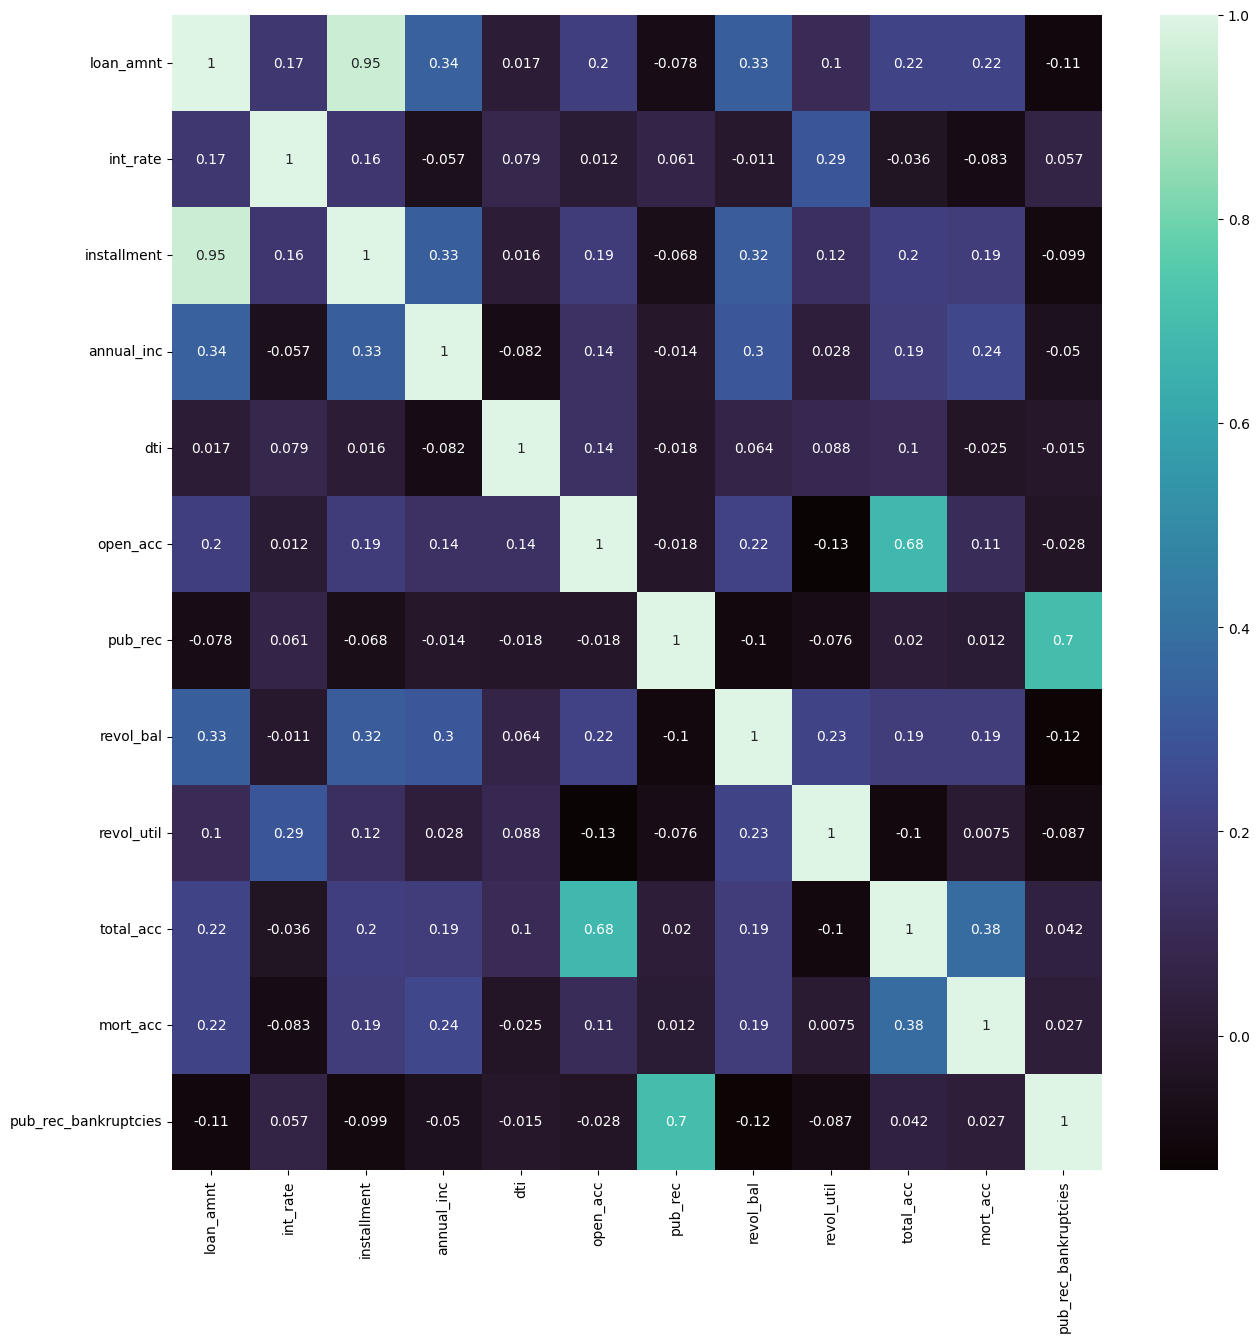

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data[numerical_data].corr(), annot=True, cmap=sns.color_palette("mako", as_cmap=True))
plt.show()

----

#### Bivariate

In [42]:
data[categorical_data].head(6)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
5,36 months,C,C3,HR Specialist,10+ years,MORTGAGE,Verified,Sep-2015,Fully Paid,debt_consolidation,Debt consolidation,Jan-2005,f,INDIVIDUAL,1726 Cooper Passage Suite 129\r\nNorth Deniseb...


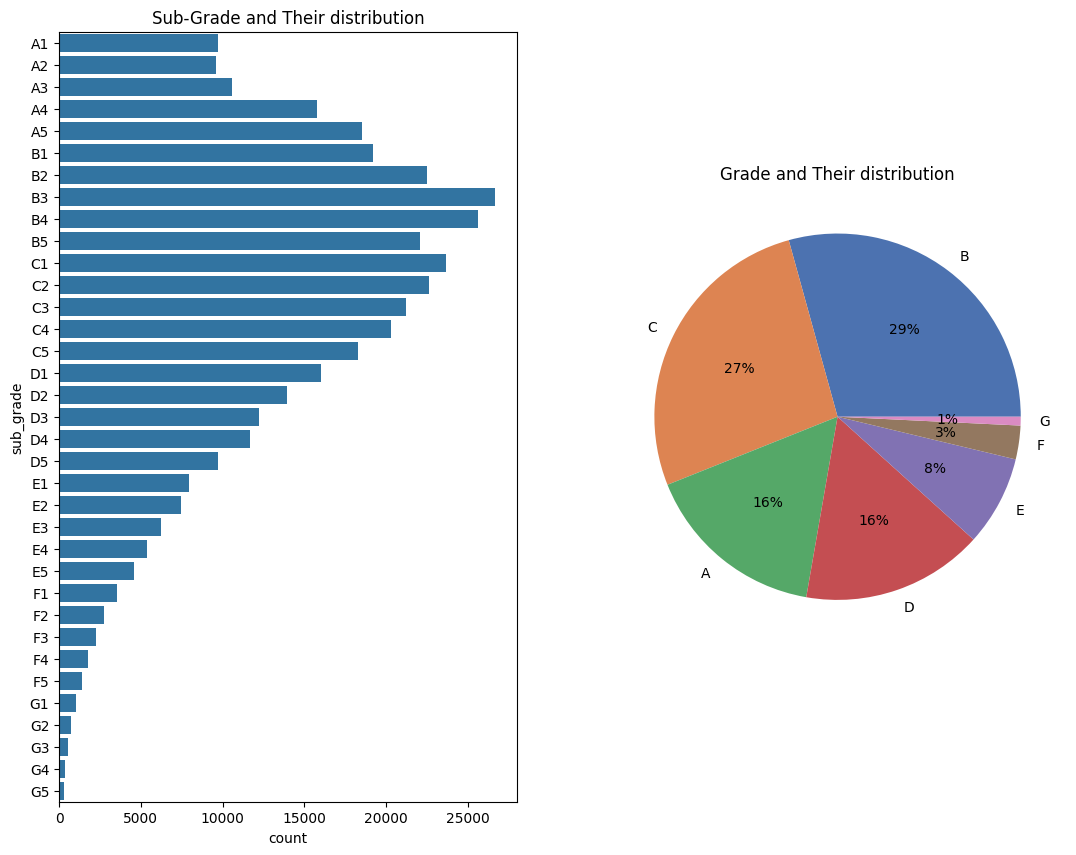

In [43]:
plt.figure(figsize=(13,10))

plt.subplot(1,2,2)
plt.pie(data['grade'].value_counts().values, labels=data['grade'].value_counts().index, colors=sns.color_palette('deep'), autopct='%.0f%%') 
plt.title('Grade and Their distribution')

plt.subplot(1,2,1)
sns.countplot(data['sub_grade'].sort_values())
plt.title('Sub-Grade and Their distribution')

plt.show()

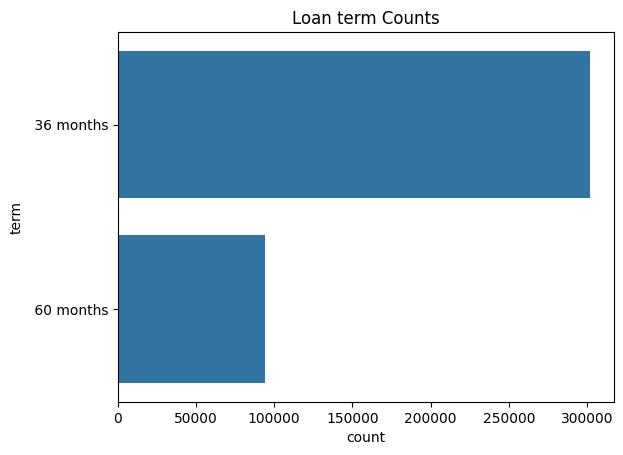

In [44]:
sns.countplot(data['term'].sort_values())
plt.title('Loan term Counts')

plt.show()

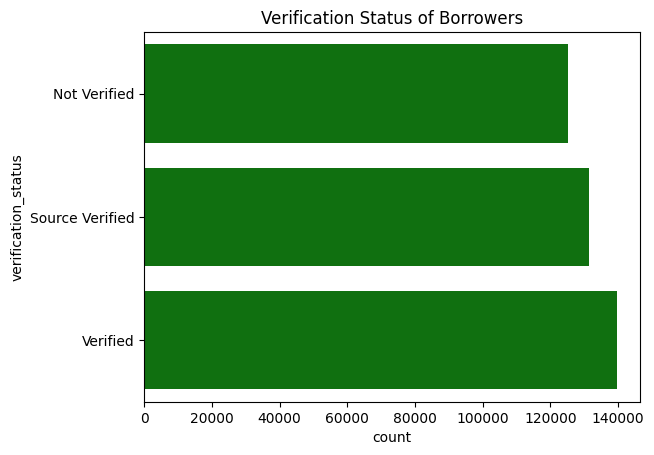

In [45]:
sns.countplot(data['verification_status'].sort_values() , color='green')
plt.title('Verification Status of Borrowers')

plt.show()

In [46]:
print(data[categorical_data].describe())

              term   grade sub_grade emp_title emp_length home_ownership  \
count       396030  396030    396030    373103     377729         396030   
unique           2       7        35    173105         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        302005  116018     26655      4389     126041         198348   

       verification_status   issue_d loan_status             purpose  \
count               396030    396030      396030              396030   
unique                   3       115           2                  14   
top               Verified  Oct-2014  Fully Paid  debt_consolidation   
freq                139563     14846      318357              234507   

                     title earliest_cr_line initial_list_status  \
count               394274           396030              396030   
unique               48816              684                   2   
top     Debt consolidation         Oct-2000              

In [47]:
data[numerical_data].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


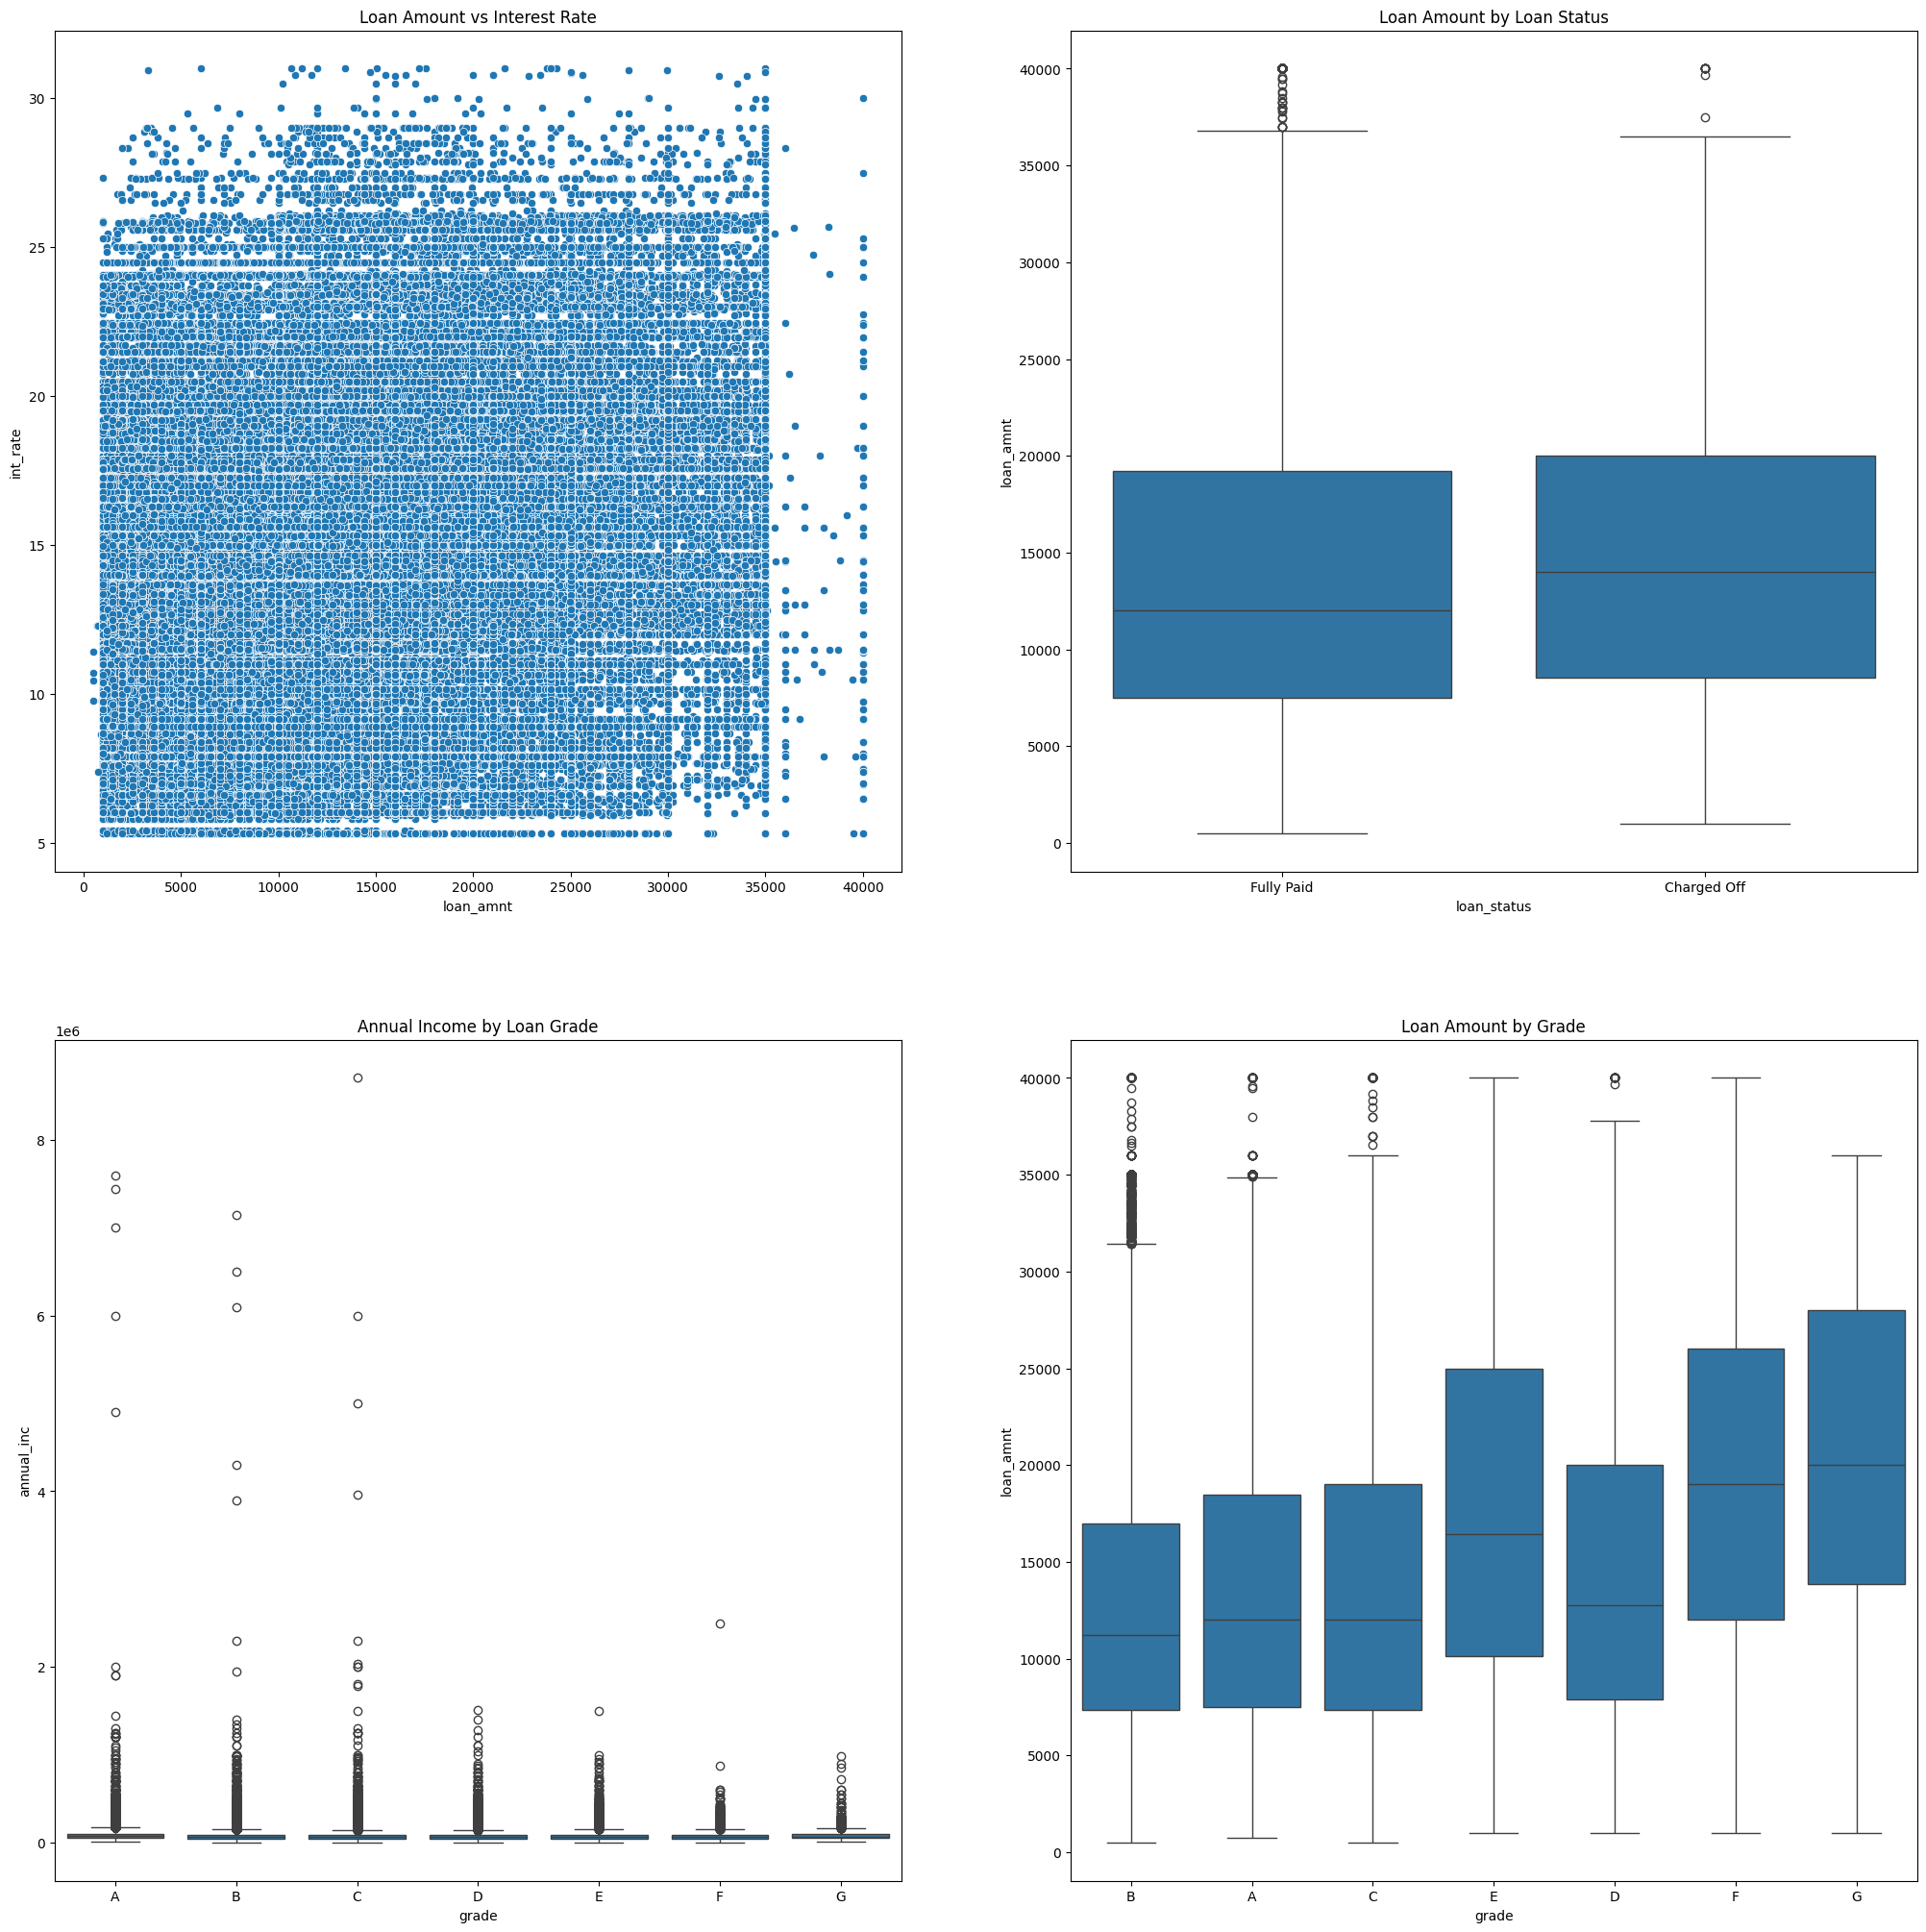

In [48]:
plt.figure(figsize=(25,25))

plt.subplot(2,2,1)
# Scatter plot between loan amount and interest rate
sns.scatterplot(x='loan_amnt', y='int_rate', data=data)
plt.title('Loan Amount vs Interest Rate')

plt.subplot(2,2,2)
sns.boxplot(x=target_variable, y=data['loan_amnt'])
plt.title('Loan Amount by Loan Status')

plt.subplot(2,2,3)
sns.boxplot(x='grade', y='annual_inc', data=data, order=sorted(data['grade'].unique()))
plt.title('Annual Income by Loan Grade')

plt.subplot(2,2,4)
sns.boxplot(x='grade', y='loan_amnt', data=data)
plt.title('Loan Amount by Grade')



plt.show()


home_ownership  ANY  MORTGAGE  NONE  OTHER    OWN    RENT
loan_status                                              
Charged Off       0     33632     7     16   7806   36212
Fully Paid        3    164716    24     96  29940  123578


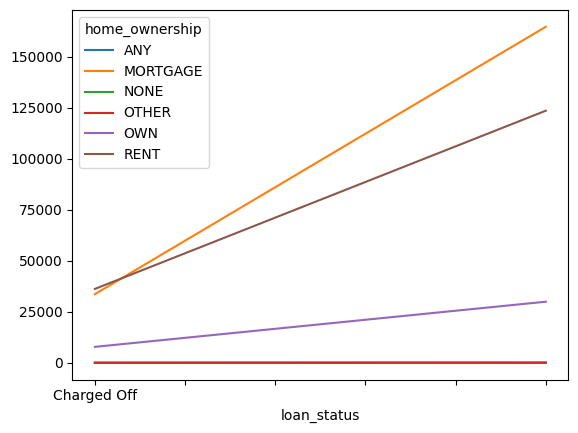

In [49]:
crosstab = pd.crosstab(target_variable, data['home_ownership'])
print(crosstab)

crosstab.plot()
plt.show()

### Comments:


    a. On range of attributes


- Loan amount ranges from 500-40000
- Range of Interest Rate : 5.3% - 31%
- Average annual Income : 74203
- Average Debt to Income Ratio is : 7.4%
- Average number of open credit lines in the borrower's credit file : 11.3
- Total Deregatory Records : 396030
- Average Revolving Balance : 15844.5


In [50]:
data['revol_bal'].mean()

15844.539853041437

    b. Outliers of various attributes


In [51]:
# funcion to calculate lower bound & upper bound of a feature
def detect_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound,upper_bound

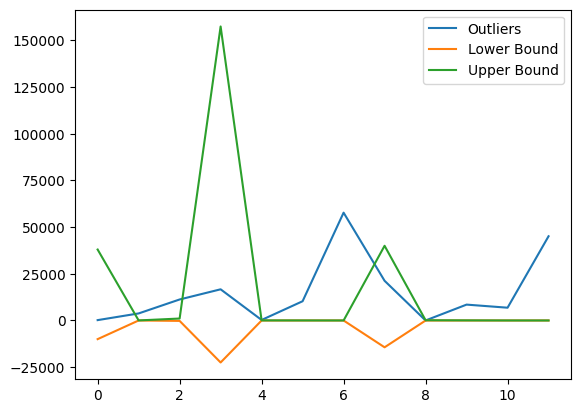

In [52]:
outliers_summary_list = []

# Loop through numerical columns and calculate outliers
for col in numerical_data:
    outliers, lower, upper = detect_outliers_iqr(col)
    
    # Append the results as a dictionary to the list
    outliers_summary_list.append({
        'Column': col,
        'Outliers': len(outliers),
        'Lower Bound': lower,
        'Upper Bound': upper
    })

# Convert the list of dictionaries into a DataFrame
outliers_summary = pd.DataFrame(outliers_summary_list)

# Display the summary DataFrame
outliers_summary.plot()
plt.show()

-------------------

----------

## 2. Data Preprocessing


### a. Duplicate value check


In [53]:
print(f"Number of duplicate rows: {data[data.duplicated()].shape[0]}")

Number of duplicate rows: 0


In [54]:
data.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

### b. Missing value treatment


In [55]:
# Identify Missing Values
missing_values_data = data.isnull().sum()
print( missing_values_data[missing_values_data > 0])

emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64


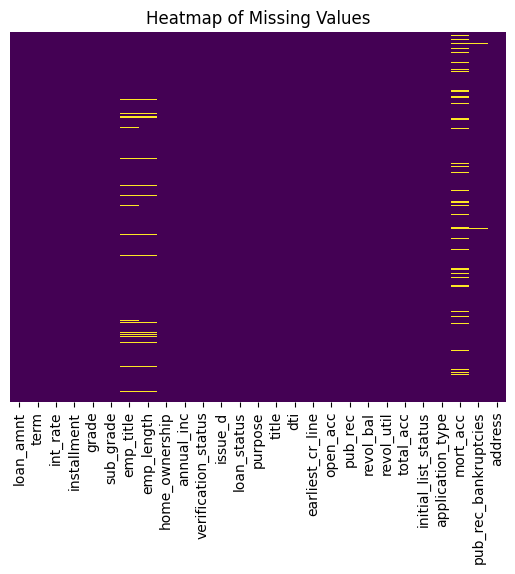

In [56]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [57]:
# Calculating the percentage of missing values
missing_percentage = round((missing_values_data / len(data)) * 100,2)

In [58]:
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values_data[missing_values_data > 0],
    'Percentage (%)': missing_percentage[missing_values_data > 0]
}).sort_values(by='Percentage (%)', ascending=False)

missing_data_summary

,Missing Values,Percentage (%)
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1756,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


##### Treating Categorical Missing values


- Replace missing values with "Unknown" or "Not Provided".
- Alternatively, drop the column if it’s not critical to the analysis.


     Categorical data 'Job titles' might be critical to the analysis 

In [59]:
data['emp_title']=data['emp_title'].fillna('Unknown')

     Categorical data 'Employment duration' critical to the analysis 

In [60]:
data['emp_length']=data['emp_length'].fillna('Not Provided')

In [61]:
data['emp_length'].isna().sum()

0

Treating `title` by replacing missing values with the mode 
    as very less percentage is missing
    
Can also be droped, Not critical to the analysis

In [62]:
data['title']=data['title'].fillna(data['title'].mode()[0])

Handling Numerical missing data


mort_acc :

- Replace with the median or mode, as it's a small percentage and likely skewed


Skewness: 1.6001324380874855
Kurtosis: 4.477175725939146


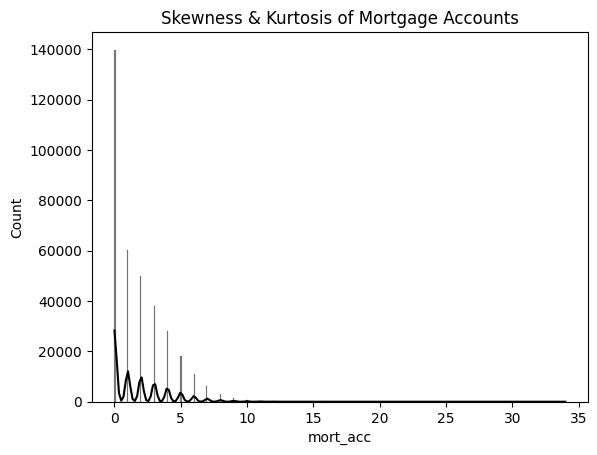

In [63]:
# Calculate skewness and kurtosis
print("Skewness:", data['mort_acc'].skew())
print("Kurtosis:", data['mort_acc'].kurt())

sns.histplot(data=data['mort_acc'],kde=True, color='black')
plt.title('Skewness & Kurtosis of Mortgage Accounts')
plt.show()

In [64]:
data['mort_acc']=data['mort_acc'].fillna(data['mort_acc'].median())

Treating pub_rec_bankruptcies by replacing missing values with the mode


In [65]:
data['pub_rec_bankruptcies']=data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])

Since revol_util : the missing percentage is small, filling with the median is straightforward and retains the dataset's size.


In [66]:
data['revol_util']=data['revol_util'].fillna(data['revol_util'].median())

In [67]:
data.isnull().sum().sum()

0

     Zero missing values remain 

---


### c. Outlier Treatment


     detect_outliers_iqr function is already defined in the abouve cells to reduce code redundancy

Loan amount 'loan_amnt'


In [68]:
# Extraction upper,lower bound & outlier
loan_amnt_outliers, loan_amnt_lower, loan_amnt_upper = detect_outliers_iqr('loan_amnt')

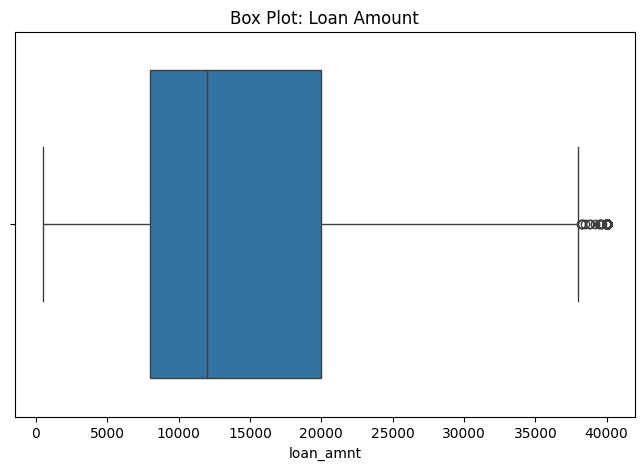

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['loan_amnt'])
plt.title('Box Plot: Loan Amount')
plt.show()

In [70]:
len(loan_amnt_outliers), loan_amnt_lower, loan_amnt_upper

(191, -10000.0, 38000.0)

as we can see their are 191 outliers in this feature <br>
we will be using caping


In [71]:
# Cap the outliers
data['loan_amnt'] = np.where(data['loan_amnt'] < loan_amnt_lower, loan_amnt_lower, data['loan_amnt'])
data['loan_amnt'] = np.where(data['loan_amnt'] > loan_amnt_upper, loan_amnt_upper, data['loan_amnt'])


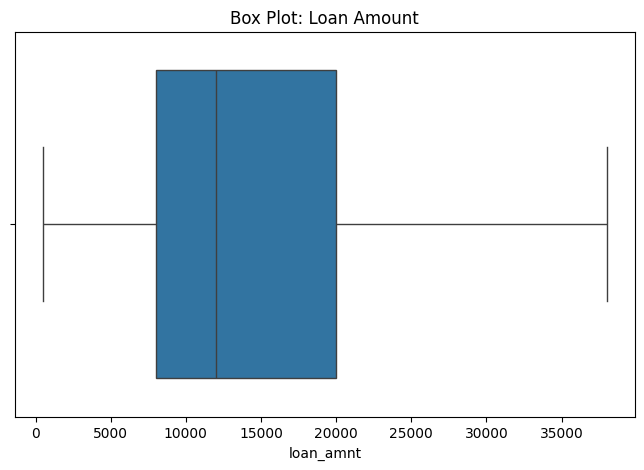

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['loan_amnt'])
plt.title('Box Plot: Loan Amount')
plt.show()

-----------------

Interest Rate 'int_rate'


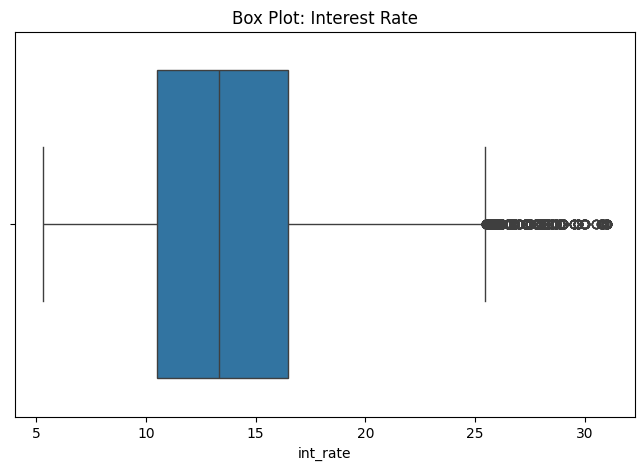

(3777, 1.4900000000000038, 25.489999999999995)

In [73]:
# Extraction upper,lower bound & outlier
int_rate_outliers, int_rate_lower, int_rate_upper = detect_outliers_iqr('int_rate')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['int_rate'])
plt.title('Box Plot: Interest Rate')
plt.show()

len(int_rate_outliers), int_rate_lower, int_rate_upper


By Domain Knowledge we know <br>The inerest rate is critical to the analysis,Hence no treatment should be performed


--------------

installment


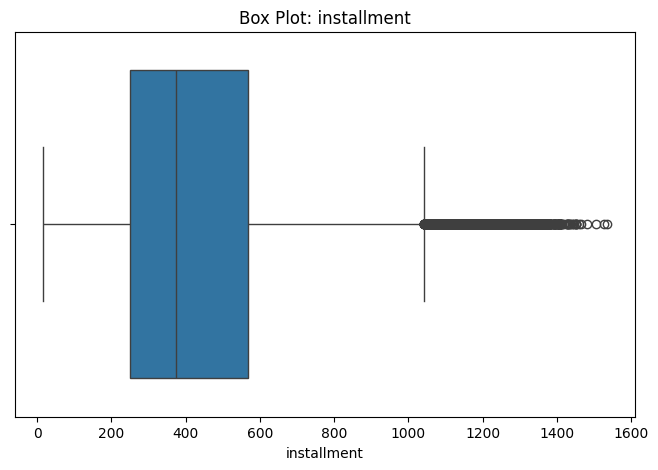

(11250, -225.12499999999986, 1042.7549999999999)

In [74]:
# Extraction upper,lower bound & outlier
installment_outliers, installment_lower, installment_upper = detect_outliers_iqr('installment')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['installment'])
plt.title('Box Plot: installment')
plt.show()

len(installment_outliers), installment_lower, installment_upper


In [75]:
# Cap the outliers
data['installment'] = np.where(data['installment'] < installment_lower, installment_lower, data['installment'])
data['installment'] = np.where(data['installment'] > installment_upper, installment_upper, data['installment'])


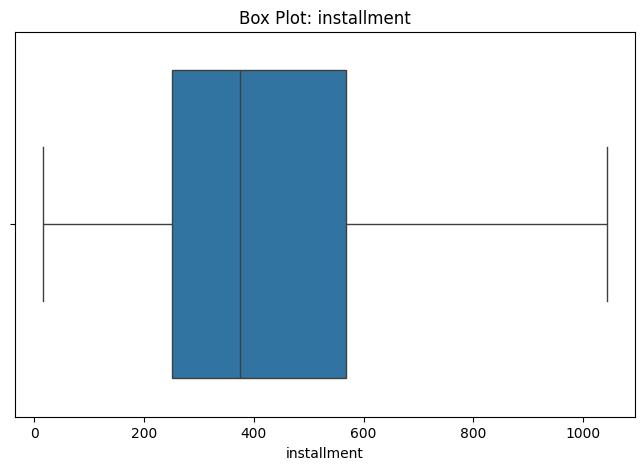

In [76]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['installment'])
plt.title('Box Plot: installment')
plt.show()


-------------

Annual income 'annual_inc'


no treatment should be done ,data critical to analysis


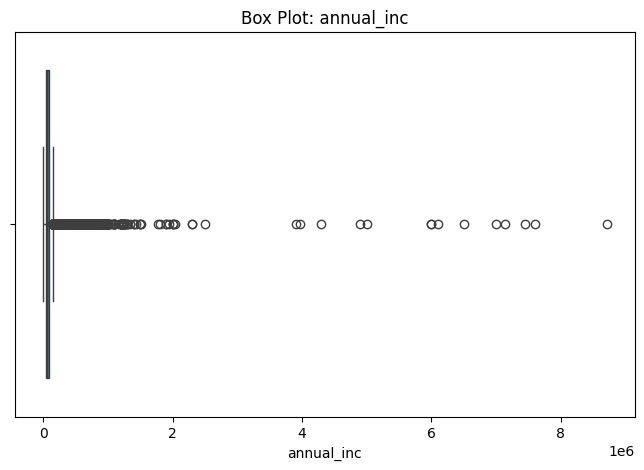

(16700, -22500.0, 157500.0)

In [77]:
# Extraction upper,lower bound & outlier
annual_inc_outliers, annual_inc_lower, annual_inc_upper = detect_outliers_iqr('annual_inc')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['annual_inc'])
plt.title('Box Plot: annual_inc')
plt.show()

len(annual_inc_outliers), annual_inc_lower, annual_inc_upper



-------------

Debt to Income ratio 'dti' <br>

This is also can not be treated as it has much information


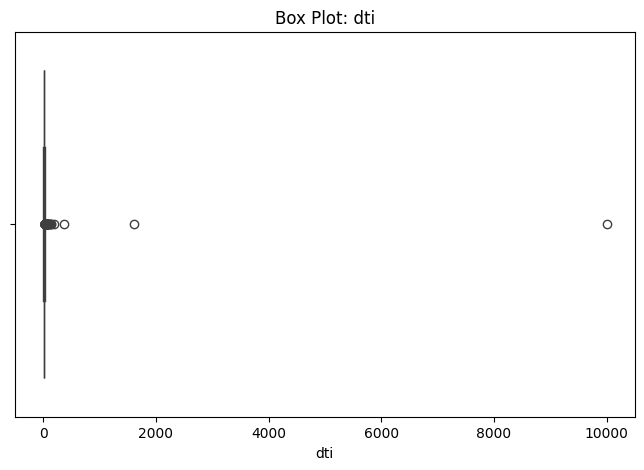

(275, -6.270000000000001, 40.53)

In [78]:
# Extraction upper,lower bound & outlier
dti_outliers, dti_lower, dti_upper = detect_outliers_iqr('dti')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['dti'])
plt.title('Box Plot: dti')
plt.show()

len(dti_outliers), dti_lower, dti_upper

----------

Open account 'open_acc'


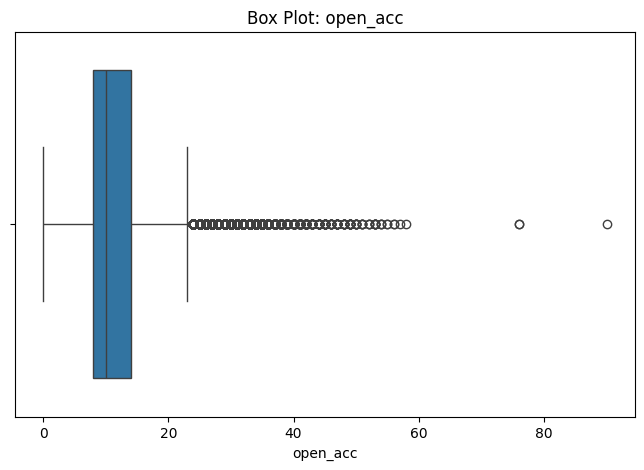

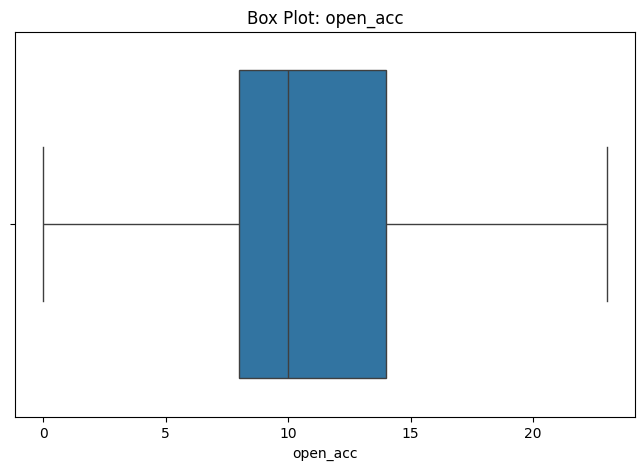

In [79]:
# Extraction upper,lower bound & outlier
open_acc_outliers, open_acc_lower, open_acc_upper = detect_outliers_iqr('open_acc')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['open_acc'])
plt.title('Box Plot: open_acc')
plt.show()

len(open_acc_outliers), open_acc_lower, open_acc_upper

# Cap the outliers
data['open_acc'] = np.where(data['open_acc'] < open_acc_lower, open_acc_lower, data['open_acc'])
data['open_acc'] = np.where(data['open_acc'] > open_acc_upper, open_acc_upper, data['open_acc'])

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['open_acc'])
plt.title('Box Plot: open_acc')
plt.show()

--------------

Public Recedings 'pub_rec'


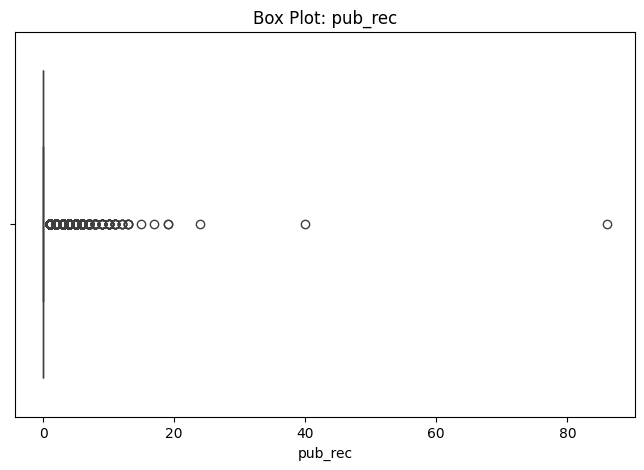

(57758, 0.0, 0.0)

In [80]:
# Extraction upper,lower bound & outlier
pub_rec_outliers, pub_rec_lower, pub_rec_upper = detect_outliers_iqr('pub_rec')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['pub_rec'])
plt.title('Box Plot: pub_rec')
plt.show()

len(pub_rec_outliers), pub_rec_lower, pub_rec_upper

critical to the analysis , should not be treated


---


Revolving Balance 'revol_bal'


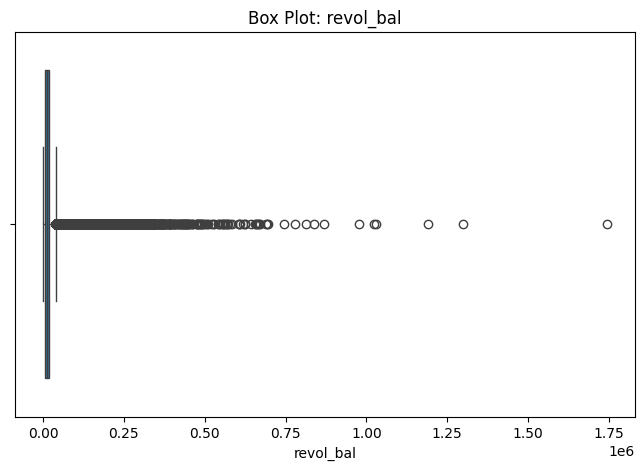

(21259, -14367.5, 40012.5)

In [81]:
# Extraction upper,lower bound & outlier
revol_bal_outliers, revol_bal_lower, revol_bal_upper = detect_outliers_iqr('revol_bal')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['revol_bal'])
plt.title('Box Plot: revol_bal')
plt.show()

len(revol_bal_outliers), revol_bal_lower, revol_bal_upper

can not be treated


---


Revolving Util 'revol_util'


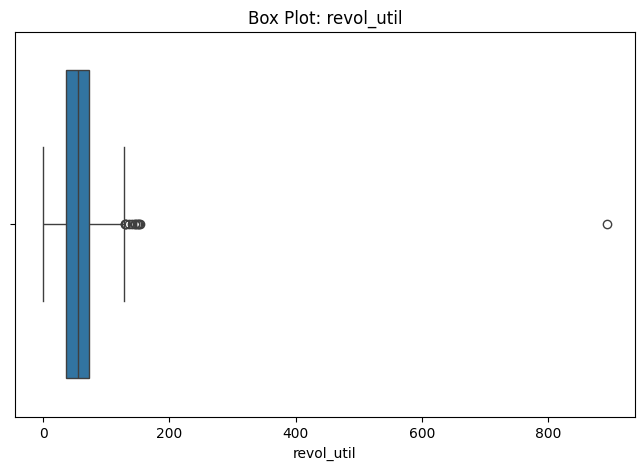

(12, -19.600000000000016, 128.40000000000003)

In [82]:
# Extraction upper,lower bound & outlier
revol_util_outliers, revol_util_lower, revol_util_upper = detect_outliers_iqr('revol_util')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['revol_util'])
plt.title('Box Plot: revol_util')
plt.show()

len(revol_util_outliers), revol_util_lower, revol_util_upper

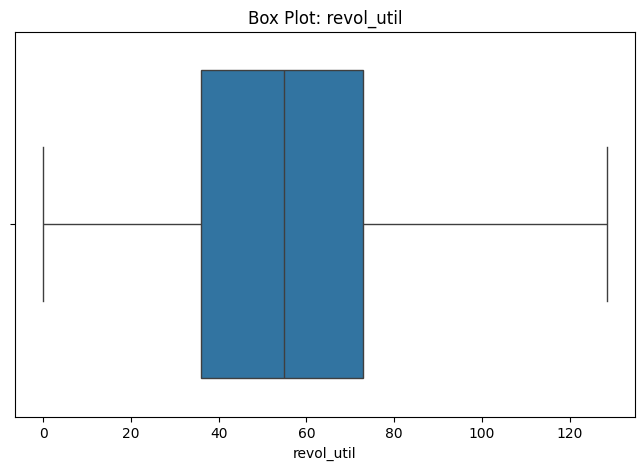

In [83]:
# Cap the outliers
data['revol_util'] = np.where(data['revol_util'] < revol_util_lower, revol_util_lower, data['revol_util'])
data['revol_util'] = np.where(data['revol_util'] > revol_util_upper, revol_util_upper, data['revol_util'])

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['revol_util'])
plt.title('Box Plot: revol_util')
plt.show()

---


Total Accounts 'total_acc'


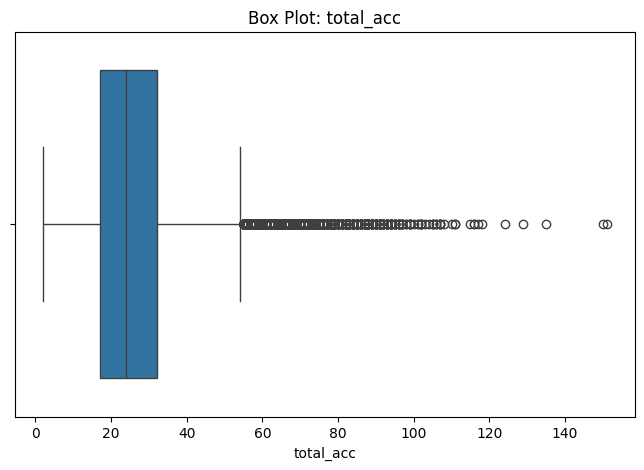

(8499, -5.5, 54.5)

In [84]:
# Extraction upper,lower bound & outlier
total_acc_outliers, total_acc_lower, total_acc_upper = detect_outliers_iqr('total_acc')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['total_acc'])
plt.title('Box Plot: total_acc')
plt.show()

len(total_acc_outliers), total_acc_lower, total_acc_upper

has valuable informatoin, should not be treated


---


Mortgage Accounts 'mort_acc'


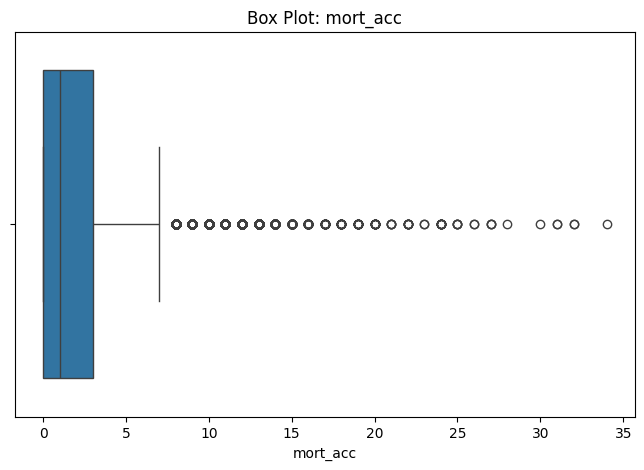

(6843, -4.5, 7.5)

In [85]:
# Extraction upper,lower bound & outlier
mort_acc_outliers, mort_acc_lower, mort_acc_upper = detect_outliers_iqr('mort_acc')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['mort_acc'])
plt.title('Box Plot: mort_acc')
plt.show()

len(mort_acc_outliers), mort_acc_lower, mort_acc_upper

These accounts are created when a borrower takes a mortgage loan from a lender, typically a bank or mortgage company.

Hence, This feature should not be treated


---


Bankruptcies 'pub_rec_bankruptcies'


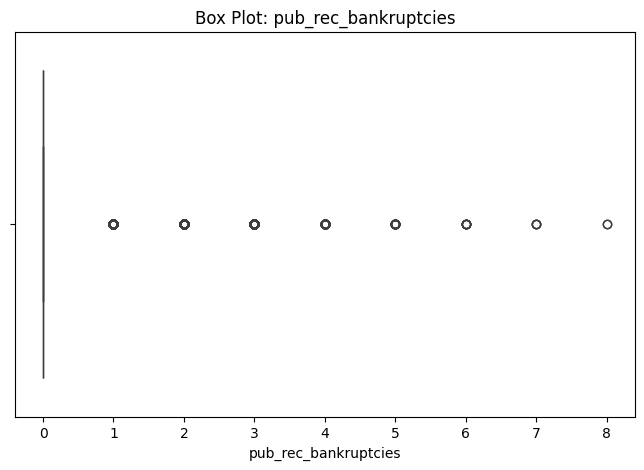

(45115, 0.0, 0.0)

In [86]:
# Extraction upper,lower bound & outlier
bankruptcies_outliers, bankruptcies_lower, bankruptcies_upper = detect_outliers_iqr('pub_rec_bankruptcies')

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['pub_rec_bankruptcies'])
plt.title('Box Plot: pub_rec_bankruptcies')
plt.show()

len(bankruptcies_outliers), bankruptcies_lower, bankruptcies_upper

These are are legal filings that indicate an individual or business has declared bankruptcy and are publicly accessible documents.
<br>

Should not be treated


---


### d. Encoding categorical columns


In [87]:
data[categorical_data].head(5)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


encoding 'term' column


In [88]:
print(data['term'].unique())

[' 36 months' ' 60 months']


In [89]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Transform the 'term' column
term_encoded = encoder.fit_transform(data[['term']])

# Create a DataFrame for the encoded data
data['term'] = pd.DataFrame(term_encoded, columns=encoder.get_feature_names_out(['term']))

---

Encoding 'grade'


In [90]:
data['grade'].value_counts().index

Index(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype='object', name='grade')

In [91]:
# Define a mapping for grades
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

# Apply the mapping to encode the grade column
data['grade'] = data['grade'].map(grade_mapping)


--------

Encoding Sub_grade


In [92]:
data['sub_grade'].value_counts().sort_index().index


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object', name='sub_grade')

In [93]:
# Define a mapping for grades
grade_mapping = {
        f"{grade}{num}": i + 1
        for i, (grade, num) in enumerate(
            [(g, n) for g in ['A', 'B', 'C', 'D', 'E', 'F', 'G'] for n in range(1, 6)]
        )
    }

# Apply the mapping to encode the grade column
data['sub_grade'] = data['sub_grade'].map(grade_mapping)

----------

Encoding emp_title


In [94]:
print(data['emp_title'].value_counts())

emp_title
Unknown                    22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Services, Inc           1
Name: count, Length: 173106, dtype: int64


Performing Target encoding of this column

In [95]:
# loan_status is categorical, convert to numeric
data['loan_status'] = data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [96]:
data['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [97]:
from sklearn.preprocessing import TargetEncoder

te=TargetEncoder(smooth='auto')

X = data[["emp_title"]]  # Convert Series to DataFrame
y = data["loan_status"]

emp_title= te.fit_transform(X, y)

data["emp_title"] = emp_title

In [98]:
print(data[['emp_title', 'loan_status']])

        emp_title  loan_status
0        0.773779            1
1        0.634380            1
2        0.780611            1
3        0.803869            1
4        0.803872            0
...           ...          ...
396025   0.803872            1
396026   0.778708            1
396027   0.637653            1
396028   0.803872            1
396029   0.816089            1

[396030 rows x 2 columns]


----

emp_length

In [99]:
data['emp_length'].value_counts().index

Index(['10+ years', '2 years', '< 1 year', '3 years', '5 years', '1 year',
       '4 years', '6 years', '7 years', '8 years', 'Not Provided', '9 years'],
      dtype='object', name='emp_length')

In [100]:
emp_length_map={'10+ years':10, '2 years':2, '< 1 year': .5, '3 years':3, '5 years':5, '1 year':1,
       '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'Not Provided':0.1}

In [101]:
data['emp_length'] = data['emp_length'].map(emp_length_map)

--------------

home_ownership encoding

In [102]:
data['home_ownership'].value_counts().index.sort_values()

Index(['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], dtype='object', name='home_ownership')

In [103]:
home_ownership_map={'ANY':1, 'MORTGAGE':13, 'NONE':14, 'OTHER':15, 'OWN':15.1, 'RENT':18}

In [104]:
data['home_ownership']=data['home_ownership'].map(home_ownership_map)

-------

verification_status

In [105]:
data['verification_status'].value_counts().index.sort_values()

Index(['Not Verified', 'Source Verified', 'Verified'], dtype='object', name='verification_status')

In [106]:
verification_status_map={'Not Verified':0, 'Source Verified':1, 'Verified':0.5}

In [107]:
data['verification_status']=data['verification_status'].map(verification_status_map)

--------

issue_d

In [108]:
data['issue_d'].value_counts().index.sort_values()

Index(['Apr-2008', 'Apr-2009', 'Apr-2010', 'Apr-2011', 'Apr-2012', 'Apr-2013',
       'Apr-2014', 'Apr-2015', 'Apr-2016', 'Aug-2007',
       ...
       'Sep-2007', 'Sep-2008', 'Sep-2009', 'Sep-2010', 'Sep-2011', 'Sep-2012',
       'Sep-2013', 'Sep-2014', 'Sep-2015', 'Sep-2016'],
      dtype='object', name='issue_d', length=115)

In [109]:
data['issue_d']=pd.to_datetime(data['issue_d'], format='%b-%Y')

In [110]:
data['issue_d'] =data['issue_d'].apply(lambda x: (x.year*10 + x.month)/1000)

___

purpose

In [111]:
data['purpose'].value_counts().index.sort_values()

Index(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object', name='purpose')

In [112]:
purpose_map={'car':1, 'credit_card':1.1, 'debt_consolidation':2, 'educational':3,
       'home_improvement':4, 'house':4.1, 'major_purchase':4.2, 'medical':4.3, 'moving':4.4,
       'other':5, 'renewable_energy':6, 'small_business':7, 'vacation':8, 'wedding':9}

In [113]:
data['purpose']=data['purpose'].map(purpose_map)

____________

title encoding

In [114]:
data['title'].value_counts().index.sort_values()

Index(['\tcredit_card', '\tdebt_consolidation', '\tother', '\tsmall_business',
       '      debt consolidation', '   HITEK  EQUIPMENT ', '  A lending hand',
       '  Personal loan ', '  Three year debit free',
       '  debt consolidation cards and medical',
       ...
       'zero debt', 'zero dept', 'zero interest', 'zerodebt', 'zeusamoose',
       'zipcar', 'zonball Loan', 'zxcvb', '~Life Reorganization~',
       '~Summer Fun~'],
      dtype='object', name='title', length=48816)

performing Target Encoding

In [115]:
te = TargetEncoder(smooth="auto")

X = data[["title"]]  # Convert Series to DataFrame
y = data["loan_status"]

title = te.fit_transform(X, y)


In [116]:
data["title"]=title

In [117]:
import pickle

model = te
with open("title_enc.pkl", "wb") as file:
    pickle.dump(model, file)


---------------

earliest_cr_line Encoding

In [118]:
data['earliest_cr_line'].value_counts().index.sort_values()

Index(['Apr-1955', 'Apr-1958', 'Apr-1960', 'Apr-1961', 'Apr-1962', 'Apr-1963',
       'Apr-1964', 'Apr-1965', 'Apr-1966', 'Apr-1967',
       ...
       'Sep-2004', 'Sep-2005', 'Sep-2006', 'Sep-2007', 'Sep-2008', 'Sep-2009',
       'Sep-2010', 'Sep-2011', 'Sep-2012', 'Sep-2013'],
      dtype='object', name='earliest_cr_line', length=684)

In [119]:
data['earliest_cr_line']=pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')

In [120]:
data['earliest_cr_line'] =data['earliest_cr_line'].apply(lambda x: (x.year*10 + x.month)/1000)

--------------

initial_list_status Encoding

In [121]:
data['initial_list_status'].value_counts().index.sort_values()

Index(['f', 'w'], dtype='object', name='initial_list_status')

In [122]:
initial_list_status_map={'f':1,'w':0}
data['initial_list_status']=data['initial_list_status'].map(initial_list_status_map)

---------------

application_type    Encoding

In [123]:
data['application_type'].value_counts().index.sort_values()

Index(['DIRECT_PAY', 'INDIVIDUAL', 'JOINT'], dtype='object', name='application_type')

In [124]:
application_type_map={'DIRECT_PAY':1, 'INDIVIDUAL':2, 'JOINT':3}
data['application_type']=data['application_type'].map(application_type_map)

------------------

address Encoding

In [125]:
data['address'].value_counts().index.sort_values()

Index(['000 Adam Station Apt. 329\r\nAshleyberg, AZ 22690',
       '000 Adrian Cliffs\r\nRandyton, LA 22690',
       '000 Alexandria Street\r\nPort Richard, FL 22690',
       '000 Amber Court\r\nLake Pamelatown, IN 00813',
       '000 Amy Pines Suite 498\r\nSouth Susan, ND 22690',
       '000 Anderson Hills Suite 654\r\nJensenchester, NH 29597',
       '000 Anderson Parks\r\nGrahamton, FL 30723',
       '000 Annette Fords\r\nKristenland, CA 11650',
       '000 April Island Suite 314\r\nLestad, IN 05113',
       '000 Barajas Place\r\nNew Kristenview, AR 30723',
       ...
       'Unit 9992 Box 2617\r\nDPO AA 05113',
       'Unit 9992 Box 7192\r\nDPO AA 22690',
       'Unit 9993 Box 6811\r\nDPO AP 30723',
       'Unit 9994 Box 8217\r\nDPO AP 30723',
       'Unit 9994 Box 9232\r\nDPO AP 48052',
       'Unit 9995 Box 6277\r\nDPO AE 48052',
       'Unit 9995 Box 8360\r\nDPO AP 00813',
       'Unit 9996 Box 9255\r\nDPO AP 05113',
       'Unit 9997 Box 3228\r\nDPO AA 11650',
       'Unit 9997

using regex to extract state and zip code

In [126]:
import re

In [127]:
def encode_addres(data,col):
    data[col]=data[col].apply(lambda x: re.search(r'\b\d{5}\b',x).group() if re.search(r'\b\d{5}\b',x) else "")
    return data[col]

In [128]:
data['address']=encode_addres(data,'address')
data['address']

0         22690
1         05113
2         87025
3         00813
4         11650
          ...  
396025    12951
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: object

In [129]:
global_mean = data['loan_status'].mean()
data['address']=data['address'].fillna(global_mean)

All Categorical columns encoded

In [130]:
data[categorical_data].head(5)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,0.0,2,9,0.773779,10.0,18.0,0.0,20.151,1,8.0,0.788135,19.906,0,2,22690
1,0.0,2,10,0.634380,4.0,13.0,0.0,20.151,1,2.0,0.770592,20.047,1,2,05113
2,0.0,2,8,0.780611,0.5,18.0,1.0,20.151,1,1.1,0.806952,20.078,1,2,87025
3,0.0,1,2,0.803869,6.0,18.0,0.0,20.151,1,1.1,0.808269,20.069,1,2,00813
4,1.0,3,15,0.803872,9.0,13.0,0.5,20.134,0,1.1,0.918100,19.993,1,2,11650


--------------

--------------

### Spliting data

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
y=data['loan_status']

In [133]:
X=data.drop('loan_status', axis=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, data['loan_status'], test_size=0.2, random_state=0)

### e. Check for imbalance dataset and balancing it

In [135]:
data['loan_status'].value_counts()

loan_status
1    318357
0     77673
Name: count, dtype: int64

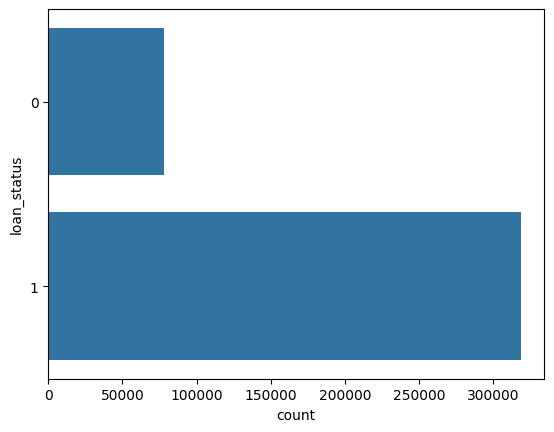

In [136]:
sns.countplot(y=data['loan_status'])
plt.show()

as we can see the data is imbalaced

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
print('Before SMOTE:')
print(y_train.value_counts())

Before SMOTE:
loan_status
1    254546
0     62278
Name: count, dtype: int64


In [139]:
smt = SMOTE()

In [140]:
X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [141]:
print('After Oversampling:')
print(y_sm.value_counts())

After Oversampling:
loan_status
0    254546
1    254546
Name: count, dtype: int64


In [142]:
data.to_csv('Bal_data.csv', index=False)

-------------

fitting balanced data on Logistic Regression Model

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [144]:
model = LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [145]:
model.fit(X_sm, y_sm)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [146]:
train_pridiction_SMOTE=model.predict(X_sm)

In [147]:
test_prediction_SMOTE=model.predict(X_test)

In [148]:
print(f'Training F1 score: {round(f1_score(y_sm, train_pridiction_SMOTE)*100,2)}')

Training F1 score: 73.18


In [149]:
print(f'Test F1 score: {round(f1_score(y_test, test_prediction_SMOTE)*100,2)}')

Test F1 score: 79.93


### f. Scaling

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
data=pd.read_csv('Bal_data.csv')

In [152]:
data.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.0,11.44,329.48,2,9,0.773779,10.0,18.0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0,2,0.0,0.0,22690
1,8000.0,0.0,11.99,265.68,2,10,0.634380,4.0,13.0,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1,2,3.0,0.0,5113
2,15600.0,0.0,10.49,506.97,2,8,0.780611,0.5,18.0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1,2,0.0,0.0,87025
3,7200.0,0.0,6.49,220.65,1,2,0.803869,6.0,18.0,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1,2,0.0,0.0,813
4,24375.0,1.0,17.27,609.33,3,15,0.803872,9.0,13.0,55000.0,...,13.0,0.0,24584.0,69.8,43.0,1,2,1.0,0.0,11650
5,20000.0,0.0,13.33,677.07,3,13,0.751555,10.0,13.0,86788.0,...,8.0,0.0,25757.0,100.6,23.0,1,2,4.0,0.0,30723
6,18000.0,0.0,5.32,542.07,1,1,1.000000,2.0,13.0,125000.0,...,8.0,0.0,4178.0,4.9,25.0,1,2,3.0,0.0,22690
7,13000.0,0.0,11.14,426.47,2,7,0.817593,10.0,18.0,46000.0,...,11.0,0.0,13425.0,64.5,15.0,1,2,0.0,0.0,30723
8,18900.0,1.0,10.99,410.84,2,8,0.800653,10.0,18.0,103000.0,...,13.0,0.0,18637.0,32.9,40.0,0,2,3.0,0.0,22690
9,26300.0,0.0,16.29,928.40,3,15,0.803869,3.0,13.0,115000.0,...,13.0,0.0,22171.0,82.4,37.0,1,2,1.0,0.0,813


In [153]:
scaler_std=StandardScaler()

In [154]:
scaled_data=data.drop('loan_status',axis=1)

In [155]:
scaled_data[scaled_data.columns]=scaler_std.fit_transform(scaled_data)

In [156]:
scaled_data['loan_status']=data['loan_status']
scaled_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,-0.492295,-0.557975,-0.491799,-0.410815,-0.616534,-0.467127,-0.219509,1.157532,1.176656,0.694330,...,-0.335785,0.996729,-0.491273,-0.034891,-1.227636,-0.008284,-0.844172,-0.341282,-0.582082,1
1,-0.731683,-0.557975,-0.368816,-0.676342,-0.616534,-0.315634,-1.265309,-0.460950,-0.938189,-0.149311,...,-0.335785,0.208163,-0.020083,0.133361,0.814574,-0.008284,0.614392,-0.341282,-1.218803,1
2,0.177990,-0.557975,-0.704225,0.327874,-0.616534,-0.618620,-0.168257,-1.405065,1.176656,-0.505312,...,-0.335785,-0.187334,1.573770,0.049235,0.814574,-0.008284,-0.844172,-0.341282,1.748430,1
3,-0.827438,-0.557975,-1.598649,-0.863751,-1.366267,-1.527580,0.006228,0.078544,1.176656,-0.327774,...,-0.335785,-0.503722,-1.323026,-1.044399,0.814574,-0.008284,-0.844172,-0.341282,-1.374569,1
4,1.228304,1.792196,0.811824,0.753882,0.133200,0.441833,0.006252,0.887785,-0.938189,-0.311550,...,-0.335785,0.424414,0.655973,1.479372,0.814574,-0.008284,-0.357984,-0.341282,-0.982003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.492295,1.792196,-0.592422,-0.877360,-0.616534,-0.467127,0.006252,-1.000444,1.176656,-0.554908,...,-0.335785,-0.672818,-0.798571,-0.203142,-1.227636,-0.008284,-0.844172,-0.341282,-0.934874,1
396026,0.824337,-0.557975,-0.301734,1.132987,0.133200,-0.164140,-0.182533,-0.191203,-0.938189,0.580763,...,-0.335785,1.331523,1.717175,-1.465027,0.814574,-0.008284,-0.357984,-0.341282,-1.218803,1
396027,-1.090765,-0.557975,-0.816028,-1.110674,-0.616534,-0.921607,-1.240750,1.157532,1.176656,-0.287214,...,-0.335785,0.818746,0.537151,-0.203142,0.814574,-0.008284,-0.844172,-0.341282,1.148586,1
396028,0.824337,1.792196,0.373556,0.311435,0.133200,-0.012647,0.006252,1.157532,-0.938189,-0.165535,...,-0.335785,-0.006825,0.000404,-0.455519,0.814574,-0.008284,1.586769,-0.341282,-0.331879,1


In [157]:
data.to_csv('scaled_data.csv', index=False)

--------------------

## 3. Model building

### a. Build the Logistic Regression model

In [158]:
Log_R_model=LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [159]:
data=pd.read_csv('scaled_data.csv')

In [160]:
data.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.0,11.44,329.48,2,9,0.773779,10.0,18.0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0,2,0.0,0.0,22690
1,8000.0,0.0,11.99,265.68,2,10,0.634380,4.0,13.0,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1,2,3.0,0.0,5113
2,15600.0,0.0,10.49,506.97,2,8,0.780611,0.5,18.0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1,2,0.0,0.0,87025
3,7200.0,0.0,6.49,220.65,1,2,0.803869,6.0,18.0,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1,2,0.0,0.0,813
4,24375.0,1.0,17.27,609.33,3,15,0.803872,9.0,13.0,55000.0,...,13.0,0.0,24584.0,69.8,43.0,1,2,1.0,0.0,11650
5,20000.0,0.0,13.33,677.07,3,13,0.751555,10.0,13.0,86788.0,...,8.0,0.0,25757.0,100.6,23.0,1,2,4.0,0.0,30723
6,18000.0,0.0,5.32,542.07,1,1,1.000000,2.0,13.0,125000.0,...,8.0,0.0,4178.0,4.9,25.0,1,2,3.0,0.0,22690
7,13000.0,0.0,11.14,426.47,2,7,0.817593,10.0,18.0,46000.0,...,11.0,0.0,13425.0,64.5,15.0,1,2,0.0,0.0,30723
8,18900.0,1.0,10.99,410.84,2,8,0.800653,10.0,18.0,103000.0,...,13.0,0.0,18637.0,32.9,40.0,0,2,3.0,0.0,22690
9,26300.0,0.0,16.29,928.40,3,15,0.803869,3.0,13.0,115000.0,...,13.0,0.0,22171.0,82.4,37.0,1,2,1.0,0.0,813


In [161]:
y=data['loan_status']
y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [162]:
X=data.drop('loan_status',axis=1)
X.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.0,11.44,329.48,2,9,0.773779,10.0,18.0,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0,2,0.0,0.0,22690
1,8000.0,0.0,11.99,265.68,2,10,0.634380,4.0,13.0,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1,2,3.0,0.0,5113
2,15600.0,0.0,10.49,506.97,2,8,0.780611,0.5,18.0,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1,2,0.0,0.0,87025
3,7200.0,0.0,6.49,220.65,1,2,0.803869,6.0,18.0,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1,2,0.0,0.0,813
4,24375.0,1.0,17.27,609.33,3,15,0.803872,9.0,13.0,55000.0,...,13.0,0.0,24584.0,69.8,43.0,1,2,1.0,0.0,11650
5,20000.0,0.0,13.33,677.07,3,13,0.751555,10.0,13.0,86788.0,...,8.0,0.0,25757.0,100.6,23.0,1,2,4.0,0.0,30723
6,18000.0,0.0,5.32,542.07,1,1,1.000000,2.0,13.0,125000.0,...,8.0,0.0,4178.0,4.9,25.0,1,2,3.0,0.0,22690
7,13000.0,0.0,11.14,426.47,2,7,0.817593,10.0,18.0,46000.0,...,11.0,0.0,13425.0,64.5,15.0,1,2,0.0,0.0,30723
8,18900.0,1.0,10.99,410.84,2,8,0.800653,10.0,18.0,103000.0,...,13.0,0.0,18637.0,32.9,40.0,0,2,3.0,0.0,22690
9,26300.0,0.0,16.29,928.40,3,15,0.803869,3.0,13.0,115000.0,...,13.0,0.0,22171.0,82.4,37.0,1,2,1.0,0.0,813


In [163]:
X.shape

(396030, 26)

In [164]:
X_train, X_test, y_train, y_test= train_test_split(X , y , test_size=0.2 , random_state=0)

In [165]:
X_train

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
44819,25000.0,1.0,14.83,592.52,4,18,0.740688,10.0,18.0,109000.0,...,11.0,0.0,6390.0,41.5,39.0,1,2,1.0,0.0,93700
41622,9500.0,0.0,12.99,320.05,3,12,0.742124,0.1,13.0,40000.0,...,6.0,1.0,62512.0,82.6,20.0,1,2,2.0,1.0,48052
362594,9000.0,0.0,8.39,283.65,2,6,0.792823,10.0,13.0,50000.0,...,14.0,0.0,8835.0,23.2,20.0,0,2,2.0,0.0,16698
228739,16700.0,1.0,22.99,470.69,6,26,0.853091,7.0,13.0,68000.0,...,13.0,0.0,23489.0,55.3,26.0,1,2,2.0,0.0,813
210327,2800.0,0.0,15.80,98.17,3,13,0.803869,9.0,13.0,218554.0,...,20.0,0.0,33014.0,90.7,44.0,0,2,7.0,0.0,813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,20000.0,0.0,7.89,625.72,1,5,0.764149,1.0,13.0,70000.0,...,11.0,1.0,7888.0,21.2,26.0,1,2,2.0,1.0,70466
358083,12400.0,0.0,13.67,421.82,2,10,0.785888,10.0,13.0,60000.0,...,8.0,1.0,16229.0,58.2,13.0,0,2,0.0,1.0,39275
152315,30000.0,0.0,12.69,1006.35,3,12,0.803872,1.0,13.0,80000.0,...,16.0,1.0,14300.0,66.2,28.0,0,2,3.0,0.0,48052
117952,14000.0,0.0,14.31,480.60,3,14,0.739064,0.1,18.0,70000.0,...,5.0,0.0,6444.0,51.1,10.0,0,2,0.0,0.0,38


In [166]:
y_train

44819     0
41622     0
362594    1
228739    1
210327    1
         ..
359783    1
358083    1
152315    0
117952    1
305711    1
Name: loan_status, Length: 316824, dtype: int64

In [ ]:
Log_R_model.fit(X_train,y_train)

In [ ]:
train_prediction=Log_R_model.predict(X_train)

In [ ]:
test_prediction=Log_R_model.predict(X_test)

In [ ]:
print(f'Training F1 score: {round(f1_score(y_train, train_prediction)*100, 2)}')

Training F1 score: 93.41


In [ ]:
print(f'Testing F1 score: {round(f1_score(y_test, test_prediction)*100, 2)}')

Testing F1 score: 93.48


--------------------

## Saving model

In [ ]:
import pickle
model = Log_R_model
with open('loan_pred.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model = scaler_std
with open('scaler.pkl', 'wb') as file:
    pickle.dump(model, file)

### b. Display model coefficients with column names


In [ ]:
coef_data=pd.DataFrame({ 
    'Feature': X.columns,
    'Coefficient': Log_R_model.coef_.flatten()
})

In [ ]:
coef_data

,Feature,Coefficient
0,loan_amnt,-1.575969e-05
1,term,-3.938013e-01
2,int_rate,3.453951e-02
3,installment,1.024744e-04
4,grade,-1.108922e-01
5,sub_grade,-6.996200e-02
6,emp_title,8.688744e+00
7,emp_length,3.024207e-02
8,home_ownership,-5.688649e-02
9,annual_inc,2.970710e-07


-----------------

-----------

## 4. Results Evaluation

### a. Confusion Matrix and comments

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix= confusion_matrix(y_test, test_prediction)

In [ ]:
conf_matrix

array([[ 8654,  6741],
       [ 1897, 61914]], dtype=int64)

In [ ]:
TN=conf_matrix[0,0]
FP=conf_matrix[0,1]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]

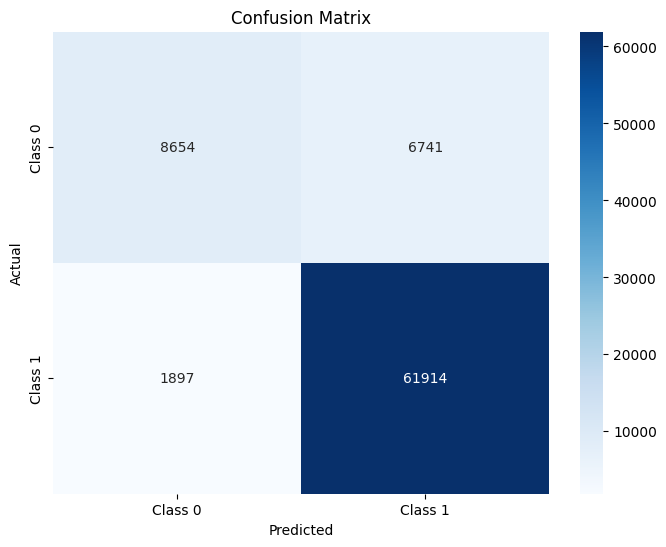

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Negetives : - 9159<br>
- The Model correctly predicted the 0 class <br>

False Positives : - 6236
- Model incorrectly predicted class 1 for actual class 0. <br>

True Positives : -62051
- Model correctly predicted class 1 (positive cases).

False Negatives : - 1,760
- Model failed to predict class 1 for actual class 1.

----

Performance Metrics Derived

    1 > Accuracy

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Proportion of correct predictions : {round(accuracy*100,2)}')

Proportion of correct predictions : 89.9


    2 > Precision

In [ ]:
precision = TP / (TP + FP)
print(f'Proportion of positive predictions that are correct : {round(precision*100,2)}')

Proportion of positive predictions that are correct : 90.9


    3 > Recall

In [ ]:
recall = TP / (TP + FN)
print(f'Proportion of actual positives correctly identified : {round(recall*100,2)}')

Proportion of actual positives correctly identified : 97.19


    4 > F1 Score

In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Harmonic mean of precision and recall : {round(recall*100,2)}')

Harmonic mean of precision and recall : 97.19


______________

High Recall (97.22%):
- The model performs well in identifying actual positive cases.

Good Precision (90.87%):
- Most positive predictions are correct.

----------

### b. Classification Report and comments

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, test_prediction, target_names=['Fully Paid', 'Charged Off'])
print(report)


              precision    recall  f1-score   support

  Fully Paid       0.84      0.60      0.70     15395
 Charged Off       0.91      0.97      0.94     63811

    accuracy                           0.90     79206
   macro avg       0.87      0.78      0.82     79206
weighted avg       0.89      0.90      0.89     79206



            Overall Accuracy: 90%
                            Indicates that 90% of the model's predictions are correct.

            Class-Specific Metrics:



Fully Paid:


        Precision: 0.84 → Out of all cases predicted as "Fully Paid," 84% are correct.
        Recall: 0.59 → The model identifies only 59% of the actual "Fully Paid" cases.
        F1-Score: 0.70 → A relatively low score due to the imbalance between precision and recall.


Charged Off:

        Precision: 0.91 → The model is very confident in predicting "Charged Off" cases.
        Recall: 0.97 → The model identifies almost all "Charged Off" cases.
        F1-Score: 0.94 → A strong balance between precision and recall for this class.

Macro Avg:

        Precision (0.87), Recall (0.78), and F1-Score (0.82) reflect the unweighted average across both classes.
        The lower recall (0.78) indicates that the model struggles with the minority class.

Weighted Avg:


        These averages are weighted by the support (i.e., the number of samples in each class).
        Indicates overall model performance:
        Precision: 0.90
        Recall: 0.90
        F1-Score: 0.89

                Low Recall for "Fully Paid" (0.59):
            
        - The model fails to identify 41% of the actual "Fully Paid" cases, leading to many false negatives.
        - This may be problematic if "Fully Paid" is a critical class for the analysis.

-----------------

### c. AU-ROC Curve & comments

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred_proba = Log_R_model.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
roc_auc = auc(fpr, tpr)

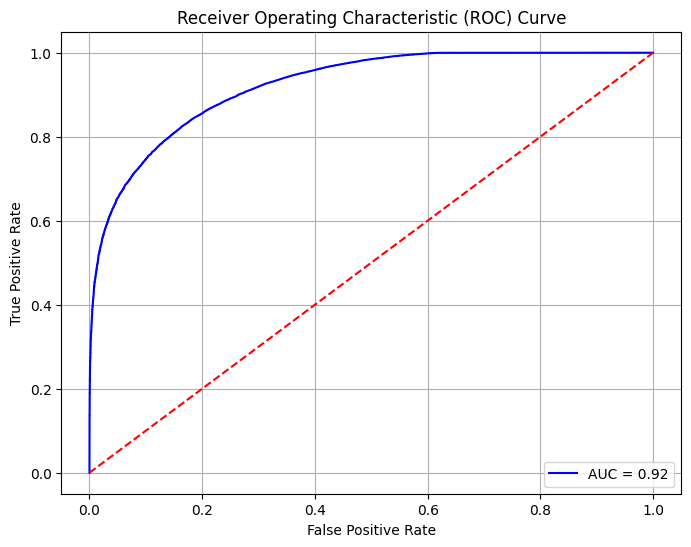

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

    Indicates a strong model.
    
    The classifier has good separation between positive and negative classes.

    AUC = 0.93 <br>
        Excellent classifier; it can distinguish between the two classes effectively.

------------------

### d. Precision Recall Curve & comments 

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [ ]:
average_precision = average_precision_score(y_test, y_pred_proba)

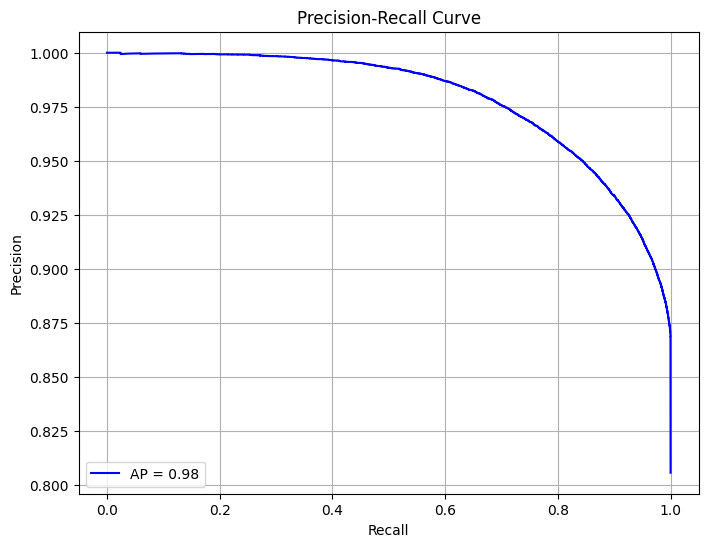

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

     Has a precision-recall curve that reaches the top-right corner (precision = 1, recall = 1)

     AP = 0.98 is excellent. <br>
        Indicates that the model maintains a good balance between precision and recall across different thresholds.

______________